In [1]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr, kendalltau

import sys
sys.path.append('..')
from attention.utils.paths import path_figures as path_save
from attention.utils.results import category_set_summary

In [2]:
def plot_regression(ax, x, ytrue, model, label):
    xminmax = [min(x), max(x)]
    ypred = model.predict(sm.add_constant(xminmax)[:, None])
    if label == 'in':
        ax.plot(x, ytrue, '+k')
        ax.plot(xminmax, ypred, '--r', label='in-set')
    else:
        ax.plot(x, ytrue, 'xk')
        ax.plot(xminmax, ypred, ':b', label='out-of-set')
    ax.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    return ax

In [3]:
def regression(x, y, label, print_stats=True):
    x0 = np.array(x)[:, None]
    x1 = sm.add_constant(x0)
    y = np.array(y)[:, None]
    lr_skl = LinearRegression().fit(x0, y)
    lr_sm = sm.OLS(y, x1).fit()
    
    if print_stats:
        print('\n'+label)
        print('SKL: beta0, beta1, R2')
        print([round(a, 4) for a in [lr_skl.intercept_[0], lr_skl.coef_[0][0], lr_skl.score(x0, y)]])

        print('SM: beta0, beta1, R2')
        print([round(a, 4) for a in lr_sm.params], round(lr_sm.rsquared, 4))

        print('SM: p0, p1')
        print([f'{a:.5f}' for a in lr_sm.pvalues])
    
    return lr_sm

In [51]:
small = 8
medium = 10
big = 12

plt.rc('font', size=medium) # default fontsize
plt.rc('axes', titlesize=big) # fontsize of the axes title
plt.rc('axes', labelsize=big) # fontsize of the x and y labels
plt.rc('xtick', labelsize=big) # fontsize of the tick labels
plt.rc('ytick', labelsize=big) # fontsize of the tick labels
plt.rc('legend', fontsize=medium) # legend fontsize
plt.rc('figure', titlesize=big) # fontsize of the figure title

In [5]:
df_diff = category_set_summary(type_category_set='diff', version_wnids=2, version_weights=3)
df_diff.head()

,size,similarity,acc_base_in,acc_base_out,acc_trained_in,acc_trained_out,acc_change_in,acc_change_out,num_epochs
0,50,0.428614,0.2246,0.668253,0.460963,0.506764,0.236363,-0.161489,93
1,50,0.449497,0.3614,0.661053,0.585833,0.516995,0.224433,-0.144058,87
2,50,0.417057,0.4320,0.657337,0.674875,0.527377,0.242875,-0.129960,105
3,50,0.436500,0.4724,0.655211,0.669160,0.516080,0.196760,-0.139130,94
4,50,0.429094,0.5064,0.653421,0.717970,0.497993,0.211570,-0.155428,102


In [6]:
df_size_v6 = category_set_summary(type_category_set='size', version_wnids=4, version_weights=6).iloc[1:]
df_size_v6.head()

,size,similarity,acc_base_in,acc_base_out,acc_trained_in,acc_trained_out,acc_change_in,acc_change_out,num_epochs
1,2,0.471780,0.630000,0.646102,0.949495,0.586551,0.319495,-0.059551,300
2,4,0.460416,0.627500,0.646145,0.973545,0.517930,0.346045,-0.128215,300
3,8,0.402342,0.645000,0.646079,0.951872,0.387327,0.306872,-0.258752,300
4,16,0.382833,0.665000,0.645762,0.898417,0.444692,0.233417,-0.201070,174
5,32,0.424631,0.655625,0.645754,0.845651,0.469524,0.190026,-0.176230,137


In [7]:
df_size_v7 = category_set_summary(type_category_set='size', version_wnids=5, version_weights=7).iloc[1:]
df_size_v7.head()

,size,similarity,acc_base_in,acc_base_out,acc_trained_in,acc_trained_out,acc_change_in,acc_change_out,num_epochs
1,2,0.298697,0.670000,0.646022,0.940000,0.589368,0.270000,-0.056654,300
2,4,0.345680,0.622500,0.646165,0.956989,0.455257,0.334489,-0.190908,300
3,8,0.473047,0.658750,0.645968,0.945736,0.461182,0.286986,-0.184786,300
4,16,0.441069,0.657500,0.645884,0.886889,0.425643,0.229389,-0.220242,197
5,32,0.440449,0.658438,0.645661,0.847413,0.476740,0.188976,-0.168921,127


In [8]:
df_sim_v3 = category_set_summary(type_category_set='sim', version_wnids=3, version_weights=3)
df_sim_v3.head()

,size,similarity,acc_base_in,acc_base_out,acc_trained_in,acc_trained_out,acc_change_in,acc_change_out,num_epochs
0,50,0.716746,0.6000,0.648495,0.760448,0.525034,0.160448,-0.123460,89
1,50,0.512130,0.6112,0.647905,0.802811,0.507715,0.191611,-0.140190,93
2,50,0.453881,0.6492,0.645905,0.802083,0.536498,0.152883,-0.109407,90
3,50,0.427748,0.6744,0.644579,0.832715,0.516972,0.158315,-0.127607,93
4,50,0.671111,0.6872,0.643905,0.800494,0.524112,0.113294,-0.119793,94


In [9]:
df_sim_v4 = category_set_summary(type_category_set='sim', version_wnids=4, version_weights=4)
df_sim_v4.head()

,size,similarity,acc_base_in,acc_base_out,acc_trained_in,acc_trained_out,acc_change_in,acc_change_out,num_epochs
0,50,0.719259,0.5840,0.649337,0.745228,0.510016,0.161228,-0.139321,88
1,50,0.568134,0.6642,0.645116,0.814936,0.521299,0.150736,-0.123817,94
2,50,0.489926,0.6620,0.645232,0.817018,0.512321,0.155018,-0.132911,99
3,50,0.425019,0.6496,0.645884,0.796205,0.519950,0.146605,-0.125934,98
4,50,0.811888,0.7142,0.642484,0.778363,0.572821,0.064163,-0.069664,74


In [10]:
x_diff = 1 - df_diff['acc_base_in']
y_diff_in = df_diff['acc_change_in']
y_diff_out = df_diff['acc_change_out']
lr_diff_in = regression(x_diff, y_diff_in, 'diff_in')
lr_diff_out = regression(x_diff, y_diff_out, 'diff_out')

x_size = np.log2(np.concatenate((df_size_v6['size'], df_size_v7['size'])))
y_size_in = np.concatenate((df_size_v6['acc_change_in'], df_size_v7['acc_change_in']))
y_size_out = np.concatenate((df_size_v6['acc_change_out'], df_size_v7['acc_change_out']))
lr_size_in = regression(x_size, y_size_in, 'size_in')
lr_size_out = regression(x_size, y_size_out, 'size_out')

x_sim = np.concatenate((df_sim_v3['similarity'], df_sim_v4['similarity']))
y_sim_in = np.concatenate((df_sim_v3['acc_change_in'], df_sim_v4['acc_change_in']))
y_sim_out = np.concatenate((df_sim_v3['acc_change_out'], df_sim_v4['acc_change_out']))
lr_sim_in = regression(x_sim, y_sim_in, 'sim_in')
lr_sim_out = regression(x_sim, y_sim_out, 'sim_out')


diff_in
SKL: beta0, beta1, R2
[0.0374, 0.3025, 0.9143]
SM: beta0, beta1, R2
[0.0374, 0.3025] 0.9143
SM: p0, p1
['0.00037', '0.00000']

diff_out
SKL: beta0, beta1, R2
[-0.0937, -0.0788, 0.7071]
SM: beta0, beta1, R2
[-0.0937, -0.0788] 0.7071
SM: p0, p1
['0.00000', '0.00000']

size_in
SKL: beta0, beta1, R2
[0.3938, -0.0427, 0.936]
SM: beta0, beta1, R2
[0.3938, -0.0427] 0.936
SM: p0, p1
['0.00000', '0.00000']

size_out
SKL: beta0, beta1, R2
[-0.1942, 0.0161, 0.2747]
SM: beta0, beta1, R2
[-0.1942, 0.0161] 0.2747
SM: p0, p1
['0.00002', '0.01770']

sim_in
SKL: beta0, beta1, R2
[0.2087, -0.1118, 0.3641]
SM: beta0, beta1, R2
[0.2087, -0.1118] 0.3641
SM: p0, p1
['0.00000', '0.00004']

sim_out
SKL: beta0, beta1, R2
[-0.1545, 0.0638, 0.3038]
SM: beta0, beta1, R2
[-0.1545, 0.0638] 0.3038
SM: p0, p1
['0.00000', '0.00023']


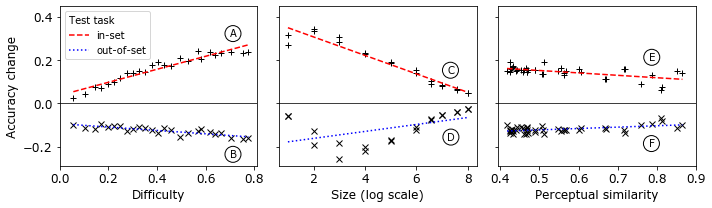

In [52]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif']=['Verdana']
style_bbox = dict(boxstyle='circle', facecolor='none', edgecolor='black')

fig, ax = plt.subplots(1, 3, sharey=True, figsize=(10, 3))

ax[0] = plot_regression(ax[0], x_diff, y_diff_in, lr_diff_in, 'in')
ax[0] = plot_regression(ax[0], x_diff, y_diff_out, lr_diff_out, 'out')
ax[0].set_xlabel('Difficulty')
ax[0].set_ylabel('Accuracy change')
ax[0].set_xticks(list(np.arange(0, 1, 0.2)))
leg = ax[0].legend(title='Test task')
leg._legend_box.align = 'left'

ax[1] = plot_regression(ax[1], x_size, y_size_in, lr_size_in, 'in')
ax[1] = plot_regression(ax[1], x_size, y_size_out, lr_size_out, 'out')
ax[1].set_xlabel('Size (log scale)')
ax[1].set_xticks(range(2, 10, 2))

ax[2] = plot_regression(ax[2], x_sim, y_sim_in, lr_sim_in, 'in')
ax[2] = plot_regression(ax[2], x_sim, y_sim_out, lr_sim_out, 'out')
ax[2].set_xlabel('Perceptual similarity')
# ax[2].legend(title='Test task')
ax[2].set_xticks(np.arange(0.4, 1, 0.1))
ax[2].set_ylim(top=0.45)

ax[0].text(x=0.9*max(x_diff),y=0.31, s='A', bbox=style_bbox)
ax[0].text(x=0.9*max(x_diff),y=-0.25, s='B', bbox=style_bbox)
ax[1].text(x=0.9*max(x_size),y=0.14, s='C', bbox=style_bbox)
ax[1].text(x=0.9*max(x_size),y=-0.17, s='D', bbox=style_bbox)
ax[2].text(x=0.9*max(x_sim),y=0.2, s='E', bbox=style_bbox)
ax[2].text(x=0.9*max(x_sim),y=-0.2, s='F', bbox=style_bbox)

plt.tight_layout()
# plt.savefig(path_save/'regression_v2.pdf')
plt.savefig('/Users/fbickfordsmith/Downloads/test.pdf')
plt.show()

In [12]:
len(x_diff), len(x_size), len(x_sim)

(25, 20, 40)

In [13]:
x_y_label = [
    [x_diff, y_diff_in, 'difficulty_in'],
    [x_diff, y_diff_out, 'difficulty_out'],
    [x_size, y_size_in, 'size_in'],
    [x_size, y_size_out, 'size_out'],
    [x_sim, y_sim_in, 'similarity_in'],
    [x_sim, y_sim_out, 'similarity_out']]

stats = []
for x, y, label in x_y_label:
    lr = regression(x, y, label, False)
    spearman = spearmanr(x, y)
    kendall = kendalltau(x, y)
    property_, categories = label.split('_')
    stats.append([
        property_, categories, spearman.correlation, spearman.pvalue, kendall.correlation, kendall.pvalue,
        lr.params[0], lr.pvalues[0], lr.params[1], lr.pvalues[1], lr.rsquared])

names = (
    'property', 'categories', 'rho', 'p_rho', 'tau', 'p_tau',
    'beta0', 'p_beta0', 'beta1', 'p_beta1', 'R2')

precision = {}
for name in names[2:]:
    if 'p_' in name:
        precision[name] = 4
    else:
        precision[name] = 2

df = pd.DataFrame(data=stats, columns=names)
df.round(precision)

,property,categories,rho,p_rho,tau,p_tau,beta0,p_beta0,beta1,p_beta1,R2
0,difficulty,in,0.95,0.0000,0.85,0.0000,0.04,0.0004,0.30,0.0000,0.91
1,difficulty,out,-0.85,0.0000,-0.67,0.0000,-0.09,0.0000,-0.08,0.0000,0.71
2,size,in,-0.97,0.0000,-0.91,0.0000,0.39,0.0000,-0.04,0.0000,0.94
3,size,out,0.69,0.0009,0.59,0.0003,-0.19,0.0000,0.02,0.0177,0.27
4,similarity,in,-0.51,0.0008,-0.37,0.0008,0.21,0.0000,-0.11,0.0000,0.36
5,similarity,out,0.38,0.0168,0.28,0.0118,-0.15,0.0000,0.06,0.0002,0.30


In [14]:
print(df.round(precision)[['property', 'categories', 'rho', 'tau', 'beta0', 'beta1', 'R2']].to_latex(index=False))

\begin{tabular}{llrrrrr}
\toprule
   property & categories &   rho &   tau &  beta0 &  beta1 &    R2 \\
\midrule
 difficulty &         in &  0.95 &  0.85 &   0.04 &   0.30 &  0.91 \\
 difficulty &        out & -0.85 & -0.67 &  -0.09 &  -0.08 &  0.71 \\
       size &         in & -0.97 & -0.91 &   0.39 &  -0.04 &  0.94 \\
       size &        out &  0.69 &  0.59 &  -0.19 &   0.02 &  0.27 \\
 similarity &         in & -0.51 & -0.37 &   0.21 &  -0.11 &  0.36 \\
 similarity &        out &  0.38 &  0.28 &  -0.15 &   0.06 &  0.30 \\
\bottomrule
\end{tabular}

